In [1]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
import os
from IPython.display import display, HTML
import matplotlib.pyplot as plt

In [4]:
project_root = os.path.abspath(os.pardir)
data_loc = os.path.join(project_root, 'data')
raw_data_loc = os.path.join(data_loc, 'raw')
loan_data = os.path.join(raw_data_loc, 'loans_income.csv')

In [5]:
loan_income_df = pd.read_csv(loan_data)
loan_income_df.describe()

,x
count,50000.00000
mean,68760.51844
std,32872.03537
min,4000.00000
25%,45000.00000
50%,62000.00000
75%,85000.00000
max,199000.00000


In [13]:
loan_income_df.head()

,x
0,67000
1,52000
2,100000
3,78762
4,37041


# Sampling Data

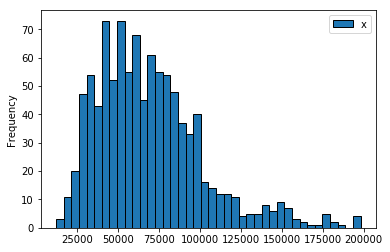

In [29]:
# Page 54 - 55
%matplotlib inline
loan_income_sample_1k_df = loan_income_df.sample(1000, random_state=np.random.RandomState())
loan_income_sample_1k_df.plot(kind='hist', edgecolor='black', bins=40);

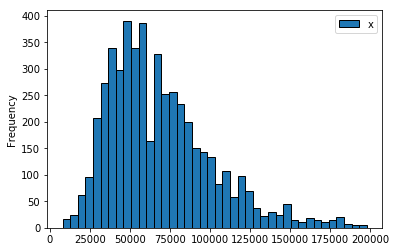

In [31]:
# This a 1000 mean calculations from 1000 random sample of 5 values
loan_income_mean_of_5 = [loan_income_df.sample(5) for i in range(1000)]
loan_income_mean_of_5_df = pd.concat(loan_income_mean_of_5)
loan_income_mean_of_5_df.plot(kind='hist', edgecolor='black', bins=40);

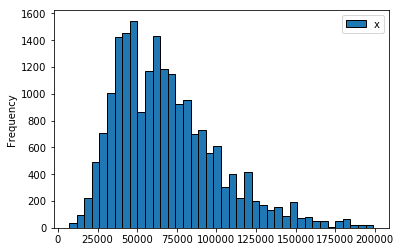

In [30]:
# This a 1000 mean calculations from 1000 random samples of 20 values
loan_income_mean_of_20 = [loan_income_df.sample(20) for i in range(1000)]
loan_income_mean_of_20_df = pd.concat(loan_income_mean_of_20)
loan_income_mean_of_20_df.plot(kind='hist', edgecolor='black', bins=40);